In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import pandas as pd

In [2]:
from quickclus import QuickClus

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
clf = QuickClus(n_components = 2)

In [6]:
clf.fit(df.drop("CustomerID", axis = 1))

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [7]:
results = clf.assing_results(df)

In [8]:
results.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [9]:
import numpy as np

In [10]:
random_array_test = np.random.rand(3)

In [11]:
clf.cluster_summary(results.drop("CustomerID", axis = 1), metric = "mean", include_cat = True)

,data_prop,data_count,Age,Annual Income (k$),Spending Score (1-100),Gender
1,0.56,112,38.098214,59.250000,51.526786,Female
0,0.44,88,39.806818,62.227273,48.511364,Male


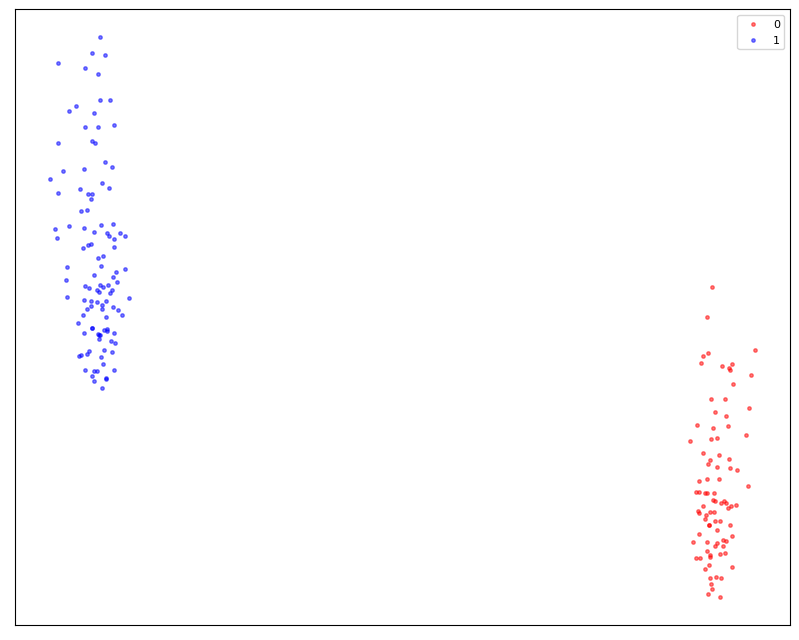

In [13]:
fig = clf.plot_2d_labels()

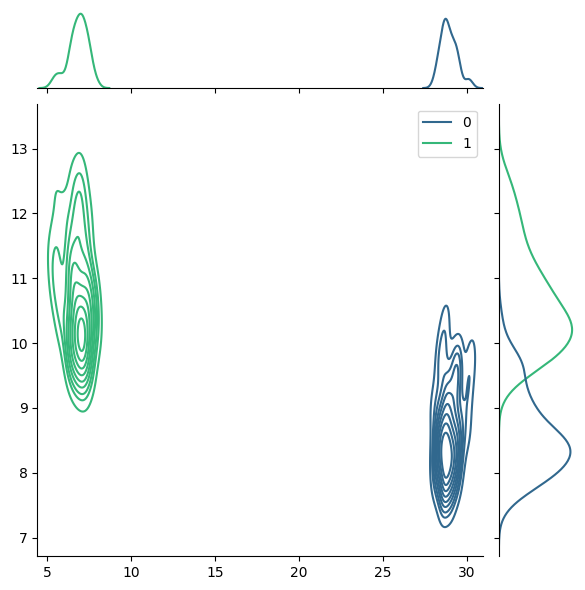

In [11]:
clf.plot_embedding_labels()

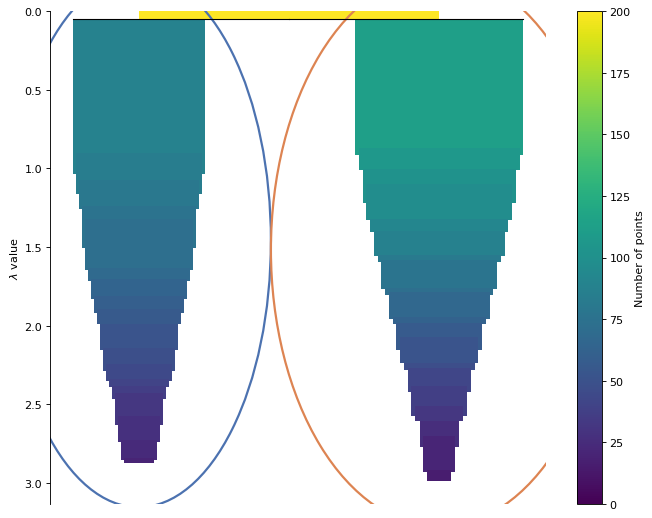

In [12]:
clf.plot_condensed_tree()

In [13]:
clf.tune_model()

[I 2022-09-24 20:42:55,647] A new study created in memory with name: no-name-8e146174-4224-4660-835d-ccd23513d476
[I 2022-09-24 20:42:55,752] Trial 0 finished with value: 0.9156528695015437 and parameters: {'min_cluster': 19, 'min_samples': 25}. Best is trial 0 with value: 0.9156528695015437.
[I 2022-09-24 20:42:55,800] Trial 1 finished with value: 0.9194065261687048 and parameters: {'min_cluster': 2, 'min_samples': 23}. Best is trial 1 with value: 0.9194065261687048.
[I 2022-09-24 20:42:55,840] Trial 2 finished with value: 0.9101460554995611 and parameters: {'min_cluster': 16, 'min_samples': 29}. Best is trial 1 with value: 0.9194065261687048.
[I 2022-09-24 20:42:55,873] Trial 3 finished with value: 0.92817830406785 and parameters: {'min_cluster': 6, 'min_samples': 15}. Best is trial 3 with value: 0.92817830406785.
[I 2022-09-24 20:42:55,914] Trial 4 finished with value: 0.9202460790816382 and parameters: {'min_cluster': 3, 'min_samples': 22}. Best is trial 3 with value: 0.92817830406

Best parameters:  {'min_cluster': 29, 'min_samples': 2}


QuickClus(min_samples=15, n_components=2)

In [14]:
results = clf.assing_results(df)
results_summary = clf.cluster_summary(results.drop("CustomerID", axis = 1), metric = "mean", include_cat = True)
results_summary

,data_prop,data_count,Age,Annual Income (k$),Spending Score (1-100),Gender
1,0.56,112,38.098214,59.250000,51.526786,Female
0,0.44,88,39.806818,62.227273,48.511364,Male


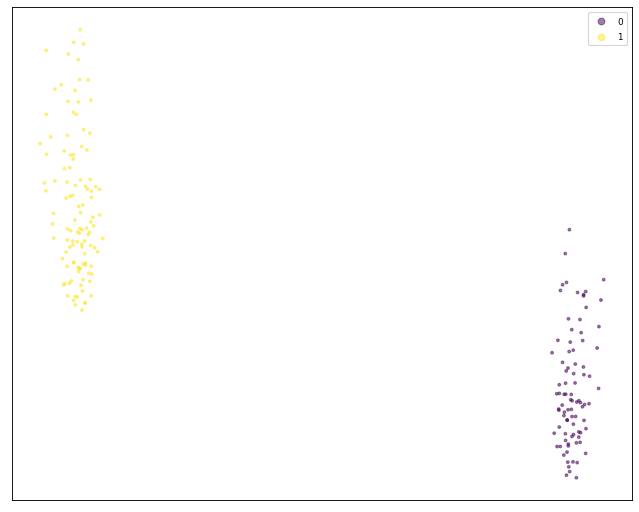

In [15]:
clf.plot_2d_labels()

In [16]:
import seaborn as sns
from matplotlib.pyplot import figure

<AxesSubplot: xlabel='Cluster', ylabel='Spending Score (1-100)'>

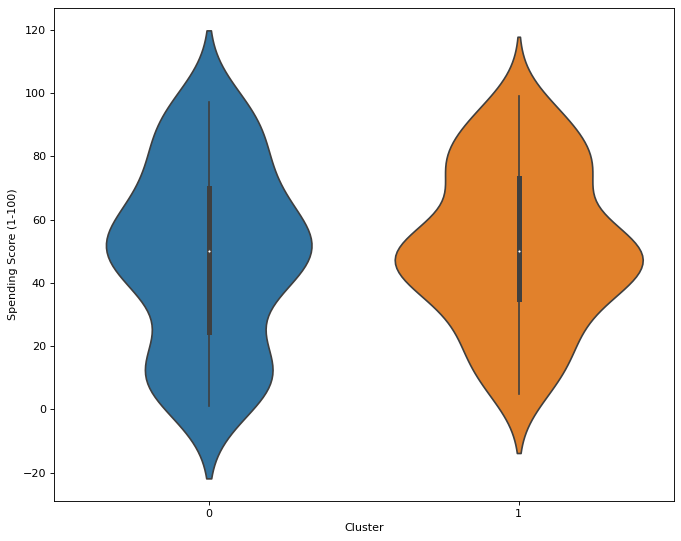

In [17]:
figure(figsize = (10, 8), dpi = 80)
sns.violinplot(x = "Cluster", y = "Spending Score (1-100)", data = results)

<AxesSubplot: xlabel='Cluster', ylabel='Age'>

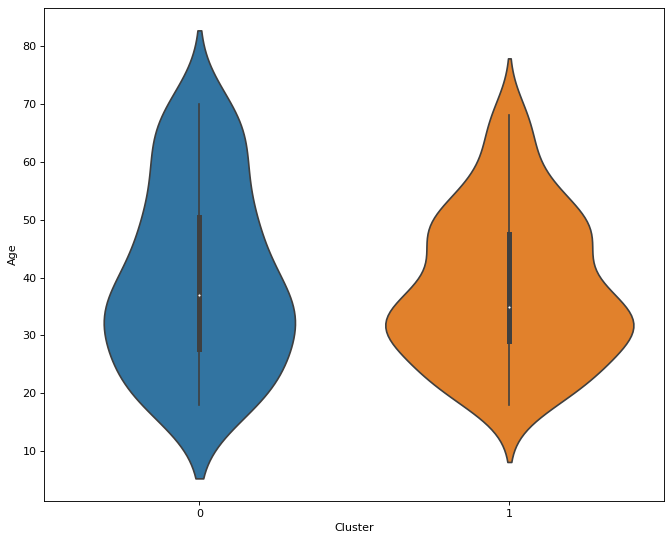

In [18]:
figure(figsize = (10, 8), dpi = 80)
sns.violinplot(x = "Cluster", y = "Age", data = results)

<AxesSubplot: xlabel='Cluster', ylabel='Age'>

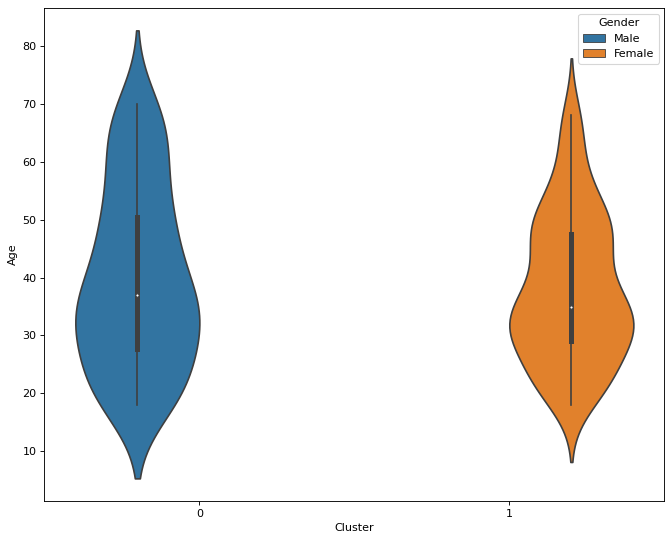

In [19]:
figure(figsize = (10, 8), dpi = 80)
sns.violinplot(x = "Cluster", y = "Age", data = results, hue = "Gender")

<AxesSubplot: xlabel='Cluster', ylabel='Annual Income (k$)'>

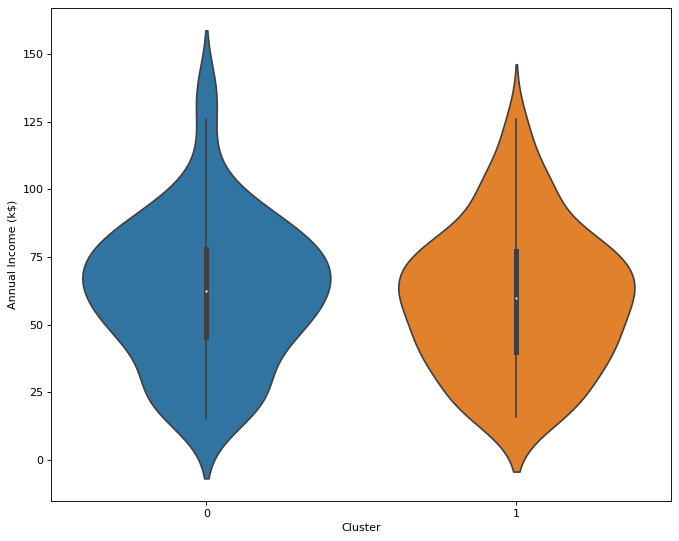

In [20]:
figure(figsize = (10, 8), dpi = 80)
sns.violinplot(x = "Cluster", y = "Annual Income (k$)", data = results)

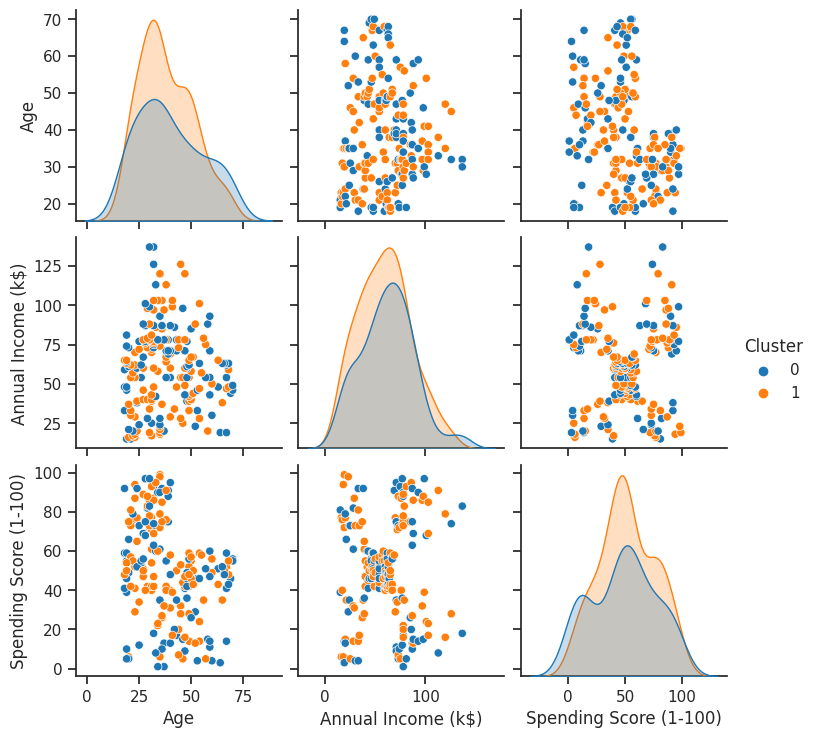

In [21]:
sns.set_theme(style="ticks")

sns.pairplot(results.drop("CustomerID", axis = 1), hue = "Cluster", palette = "tab10")

In [22]:
to_drop = ["CustomerID"]

In [23]:
numerics_cols = results.select_dtypes(include = [int, float]).drop(["Cluster"], 1).columns.tolist()

cat_cols = results.select_dtypes(exclude = ["float", "int", "datetime"]).columns.tolist()

In [24]:
columns_analyze_numerical = [c for c in numerics_cols if c not in to_drop]

columns_analyze_categorical = [c for c in cat_cols if c not in to_drop]

clf.describe_cluster(results_df = results, clusters = [0, 1],
                    columns_analyze_numerical = columns_analyze_numerical,
                    columns_analyze_categorical = columns_analyze_categorical, 
                    metric = "mean")

Analysis of cluster 0:
The cluster 0 has 88 rows (44.00% of total).
The average Age in the dataset is 38.85 and in the cluster 0 is 39.81 (+2.5%).
The average Annual Income (k$) in the dataset is 60.56 and in the cluster 0 is 62.23 (+2.8%).
The average Spending Score (1-100) in the dataset is 50.20 and in the cluster 0 is 48.51 (-3.4%).
The most common value of the column Gender in the dataset is Female (56.0%) and in the cluster 0 is Male (100.0%).


Analysis of cluster 1:
The cluster 1 has 112 rows (56.00% of total).
The average Age in the dataset is 38.85 and in the cluster 1 is 38.10 (-1.9%).
The average Annual Income (k$) in the dataset is 60.56 and in the cluster 1 is 59.25 (-2.2%).
The average Spending Score (1-100) in the dataset is 50.20 and in the cluster 1 is 51.53 (+2.6%).
The most common value of the column Gender in the dataset is Female (56.0%) and in the cluster 1 is Female (100.0%).


